In [1]:
import pandas as pd
import numpy as np
from os import path

from scipy.signal import resample

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')
# sorted(mpl.style.available)


#adding local modules
import sys
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio
from loaders.biodarw import load_arquimedes_dataset

# setting up variables
doc_path = "/data/elekin/doc"
coefficients=17
et = "T001"
ct ="C01"
features = ['x', 'y', 'timestamp', 'pen_up', 'azimuth', 'altitude', 'pressure']

%matplotlib inline

In [2]:
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202208-v1.csv"),index_col=0)
#missing level value with 1
#metadf.level=metadf.level.fillna(1)
#delete subjects without TRS
#metadf=metadf[~metadf.TRS.isna()]
metadf.count()

abs_path         53
relative_path    53
temblor          53
Sexo             46
TRS              50
age              50
level            53
dtype: int64

In [3]:
def read(filename):
    df = pd.read_csv(filename, sep="\s+", header=None, names=features, skiprows=1)
    return df

In [4]:
dataset = None
for i, filename in zip(metadf.index, metadf["abs_path"]) :
    tmp_df = read(filename)
    tmp_df['subject_id'] = i
    dataset = pd.concat([tmp_df,dataset])
tmp_df.head(10)

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,3880,5330,1368624260328,1,120,590,1229,C107_2
1,3870,5330,1368624260359,1,120,590,1229,C107_2
2,3870,5330,1368624260531,0,120,590,0,C107_2
3,5310,7740,1368624263405,0,120,590,0,C107_2
4,5306,7747,5208200,0,2620,520,0,C107_2
5,5306,7747,5208207,0,2620,530,0,C107_2
6,5306,7748,5208215,0,2620,530,0,C107_2
7,5309,7751,5208222,0,2620,530,0,C107_2
8,5316,7756,5208230,0,2620,530,0,C107_2
9,5325,7764,5208237,0,2620,530,0,C107_2


In [5]:
r = dataset.groupby('subject_id').apply(extract_radio).apply(resample, num=4096)
rd = dataset.groupby('subject_id').apply(extract_residues, c=coefficients).apply(resample, num=4096)
rd.head(10)

subject_id
C01_1    [7.349452135538814e-15, -13.291940347957633, 1...
C01_2    [6.756754382672781e-14, -31.209052718020665, -...
C02_1    [3.542766945433196e-14, -60.542107171840655, -...
C02_2    [0.0, -27.96829760698023, 3.8470429672404, 19....
C03_1    [-1.4486724966019762e-13, -24.21752524435715, ...
C03_2    [-3.216603719798155e-14, -4.7430528895370925, ...
C04_1    [1.2759241760952961e-14, -19.238670114026245, ...
C04_2    [-8.748646429879872e-14, -6.63962490169419, 7....
C05_1    [0.0, -27.907347281976882, 10.881925912223965,...
C05_2    [7.349452135538813e-14, -55.60480039587575, 20...
dtype: object

In [6]:
dataset[dataset["subject_id"]=="C106_1"]

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,4060,5320,1368623359343,1,400,370,1229,C106_1
1,4060,5320,1368623359484,0,400,370,0,C106_1
2,5450,2540,1368623368937,0,400,370,0,C106_1
3,5446,2549,4314009,0,610,610,0,C106_1
4,5446,2549,4314016,0,610,610,0,C106_1
...,...,...,...,...,...,...,...,...
3206,5664,3861,4346462,1,90,770,1944,C106_1
3207,5664,3861,4346469,1,90,770,1858,C106_1
3208,5664,3861,4346477,1,90,770,1684,C106_1
3209,5664,3861,4346484,1,90,770,1317,C106_1


In [7]:
rd_df = pd.DataFrame(rd.tolist(), index=rd.index)
rd_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,7.349452e-15,-13.291940,1.024601,10.161138,3.315941,-3.097414,1.440666,7.129718,4.707049,0.572884,...,97.448900,95.955542,101.818591,104.332167,95.874072,89.940103,101.853141,116.800260,101.116099,49.724857
C01_2,6.756754e-14,-31.209053,-0.017404,17.752622,1.237945,-9.987982,2.213369,11.402657,2.611116,-4.204175,...,222.096143,213.065104,221.689744,232.912255,220.952794,204.349330,222.760910,255.393283,225.934430,113.379869
C02_1,3.542767e-14,-60.542107,-27.549071,22.667162,29.774608,-0.049968,-21.247772,-10.065639,13.253232,17.932418,...,344.367840,374.472317,380.804964,362.103375,356.832894,397.935247,458.875221,461.692858,352.041872,164.092353
C02_2,0.000000e+00,-27.968298,3.847043,19.568139,4.392351,-0.129432,17.771599,29.816480,28.274217,34.182908,...,214.985799,204.703211,209.397646,222.910419,215.988709,197.589052,209.616093,241.172176,216.979362,109.734380
C03_1,-1.448672e-13,-24.217525,0.030620,15.214947,2.708331,-8.058323,0.193426,9.060716,3.685560,-3.239162,...,110.591346,104.897082,115.563854,127.342230,121.951827,117.953167,145.015919,181.972929,167.326704,85.417298
C03_2,-3.216604e-14,-4.743053,2.357251,4.825403,1.856053,3.416943,9.272533,11.910841,11.251721,11.652002,...,36.862525,35.561624,34.204905,36.363264,37.555728,34.273989,33.939043,40.137283,39.286630,21.104560
C04_1,1.275924e-14,-19.238670,4.887121,9.269133,-5.603701,-4.442068,5.761753,2.020816,-4.567960,0.597289,...,77.518802,72.292842,64.360034,75.220587,89.323213,86.753011,95.350440,133.114825,143.943629,80.689566
C04_2,-8.748646e-14,-6.639625,7.783162,-1.958290,-0.019630,4.697744,-0.645690,3.079784,4.094312,2.093642,...,82.562342,79.182332,82.388434,82.390361,78.429148,85.139955,80.384840,77.471092,93.832116,63.282700
C05_1,0.000000e+00,-27.907347,10.881926,10.252521,-11.110835,-1.430228,9.070397,-2.783219,-4.909954,5.666420,...,107.457379,118.450235,114.096347,128.871858,158.741696,158.948752,160.007117,212.835150,236.414668,134.861681


In [8]:
r_df = pd.DataFrame(r.tolist(), index=r.index)
r_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,3.527737e-13,-137.440209,-8.198945,78.949506,15.312816,-48.835657,-10.701902,41.748265,18.772267,-24.300636,...,997.404273,979.010251,1034.318590,1067.180194,998.933585,942.632225,1036.986862,1151.718740,982.017407,482.303983
C01_2,0.000000e+00,-177.451717,-0.389423,98.477029,1.486850,-65.481842,1.466364,52.845670,2.554855,-38.452026,...,1301.391143,1251.146997,1302.799460,1369.240820,1301.354254,1204.132088,1303.043363,1478.827109,1298.855775,648.750166
C02_1,1.417107e-13,-164.863743,-74.921167,60.734086,79.490696,-1.256848,-59.023608,-30.267219,31.045448,42.944158,...,1251.318680,1300.047500,1275.120257,1178.563351,1123.154593,1200.056078,1332.930470,1307.845565,981.405872,452.592371
C02_2,-3.874975e-13,-173.506581,12.533298,98.789703,-6.644510,-53.668370,29.276015,68.959569,15.670456,2.866891,...,1308.717428,1245.042452,1272.210307,1352.842797,1310.056139,1198.105950,1270.200316,1460.439764,1314.018560,665.377886
C03_1,-1.043044e-12,-164.978772,-6.104772,92.636466,9.934336,-61.280020,-8.695206,47.662575,11.075364,-35.932282,...,1265.501141,1232.800327,1290.273126,1333.493903,1249.759273,1162.490892,1257.616186,1396.439206,1198.598442,590.862907
C03_2,-6.175879e-13,-180.152953,42.615014,89.094131,-45.198493,-40.555242,55.865480,32.177905,-30.387775,8.443173,...,1435.259341,1387.203272,1338.007302,1418.149011,1455.547989,1327.891563,1317.936157,1541.020305,1480.164761,781.011853
C04_1,1.020739e-12,-161.077173,40.075009,75.297055,-46.347981,-37.098441,44.683806,14.017878,-39.272680,1.342143,...,1355.535910,1319.924981,1270.788601,1335.481102,1369.627175,1248.384862,1221.021118,1409.174281,1350.322556,712.084169
C04_2,3.110630e-13,-110.234157,99.314155,-41.077722,-12.959986,44.730159,-36.790745,15.311130,18.146633,-23.524561,...,1308.225745,1251.533838,1301.072658,1299.329279,1235.469702,1339.451346,1264.534806,1219.730369,1462.409515,975.671703
C05_1,3.853217e-13,-148.911009,57.573407,53.914027,-59.420537,-8.500972,46.647416,-16.418410,-28.133120,27.266694,...,1328.257431,1343.882251,1266.395416,1270.228079,1341.989076,1256.178103,1166.135363,1331.903715,1346.360752,738.043036


Loading labels based on clinic, residues and features from residues.


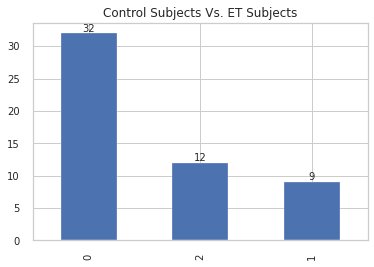

In [9]:
y = metadf['level']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects', x='counts')
_ = ax.bar_label(ax.containers[0])

## Residues Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

0.00019526612494002004

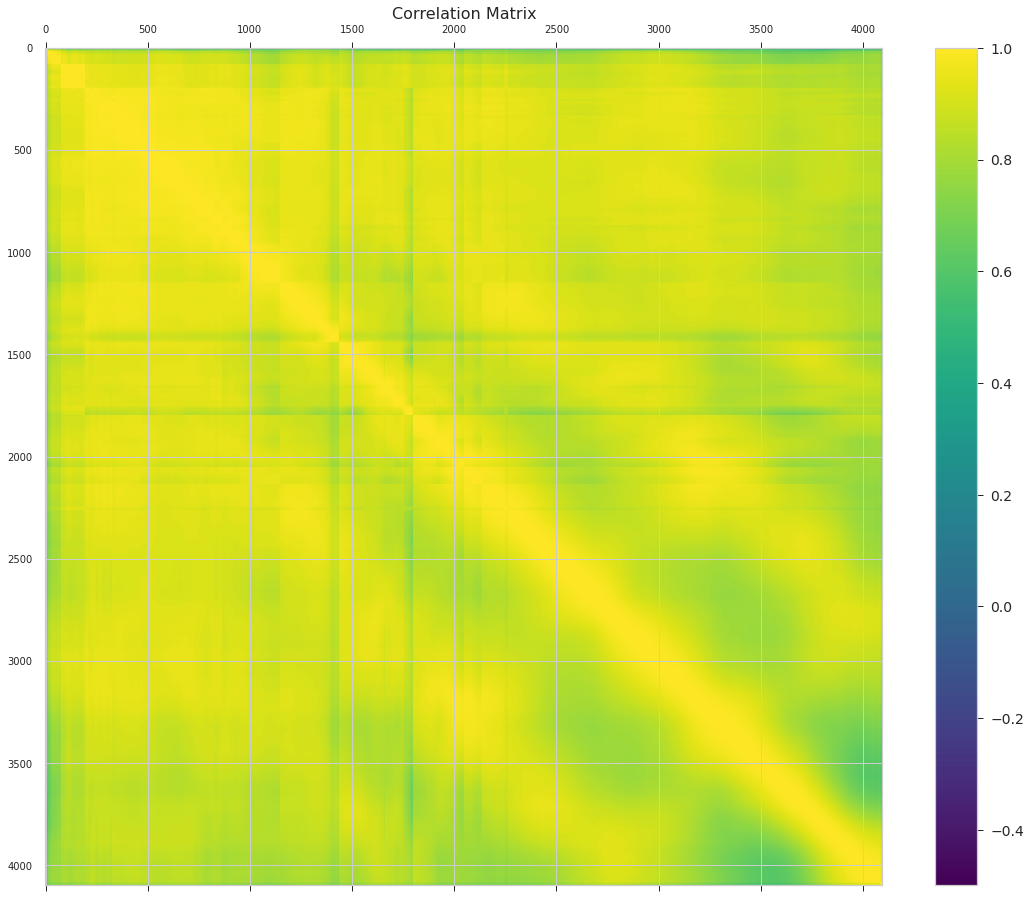

In [10]:
df=r_df
f = plt.figure(figsize=(19, 15))
corrMatrix = df.corr("pearson")
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

0.7757169475931177

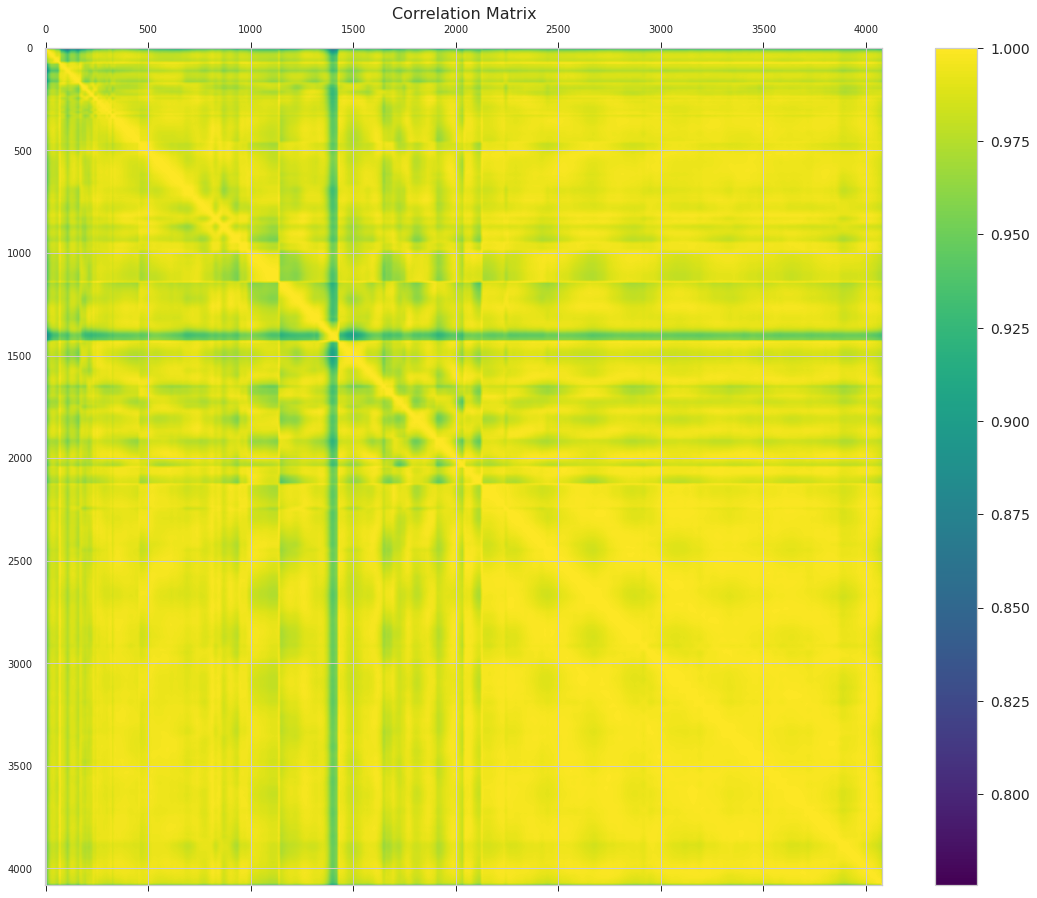

In [11]:
denom = 256
l = len(rd_df.T)
f = plt.figure(figsize=(19, 15))

corrMatrix = rd_df.rolling(round(l/denom), axis=1).mean().dropna(axis=1).corr("pearson")

plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

corrMatrix.abs().min().min()

In [12]:
rd_df.index

Index(['C01_1', 'C01_2', 'C02_1', 'C02_2', 'C03_1', 'C03_2', 'C04_1', 'C04_2',
       'C05_1', 'C05_2', 'C06_1', 'C06_2', 'C07_1', 'C07_2', 'C08', 'C101_1',
       'C101_2', 'C102_1', 'C102_2', 'C103_1', 'C103_2', 'C104_1', 'C104_2',
       'C106_1', 'C106_2', 'C107_1', 'C107_2', 'T001', 'T002_1', 'T002_2',
       'T005', 'T006', 'T007', 'T008', 'T009', 'T010', 'T011_1', 'T011_2',
       'T012_1', 'T012_2', 'T013', 'T014', 'T015', 'T018', 'T021', 'T023_1',
       'T023_2', 'T025', 'T026', 'T027', 'T028_1', 'T028_2', 'T029'],
      dtype='object', name='subject_id')

0.01597682943877501

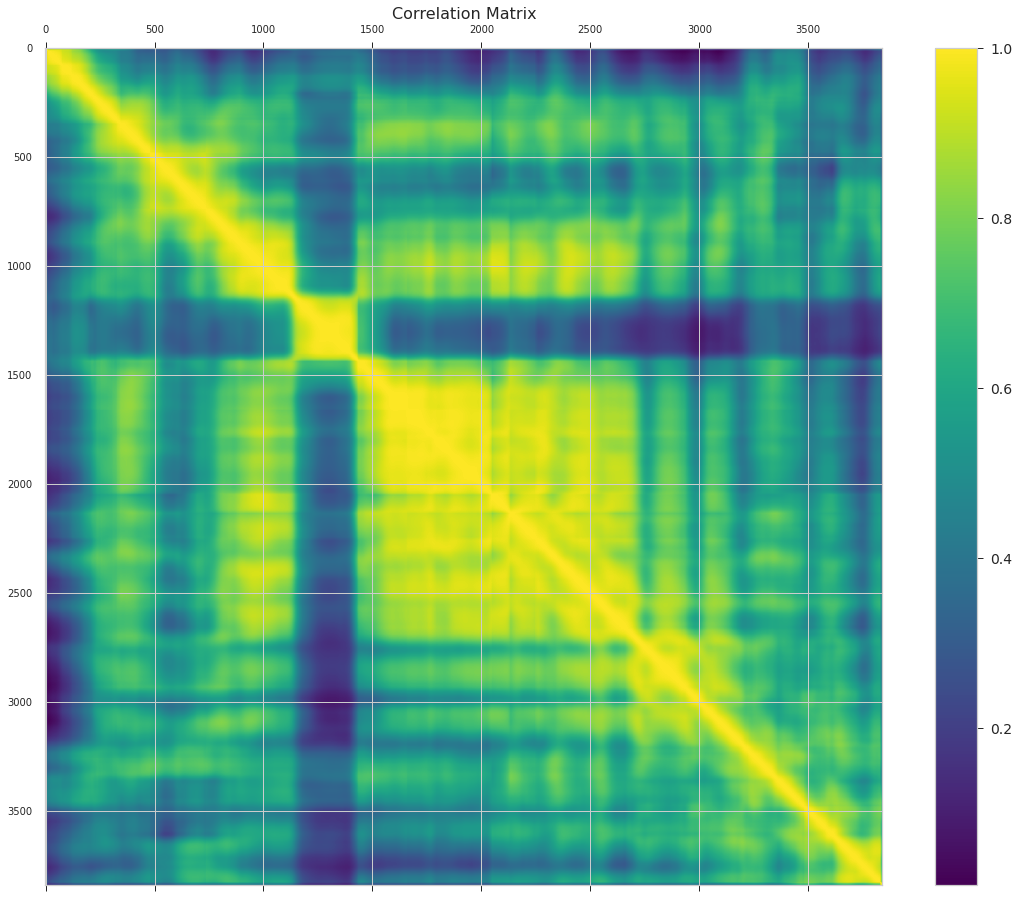

In [13]:
denom = 16
l = len(rd_df.T)
corrMatrix = rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).corr("pearson")
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

7.435111546050722e-07

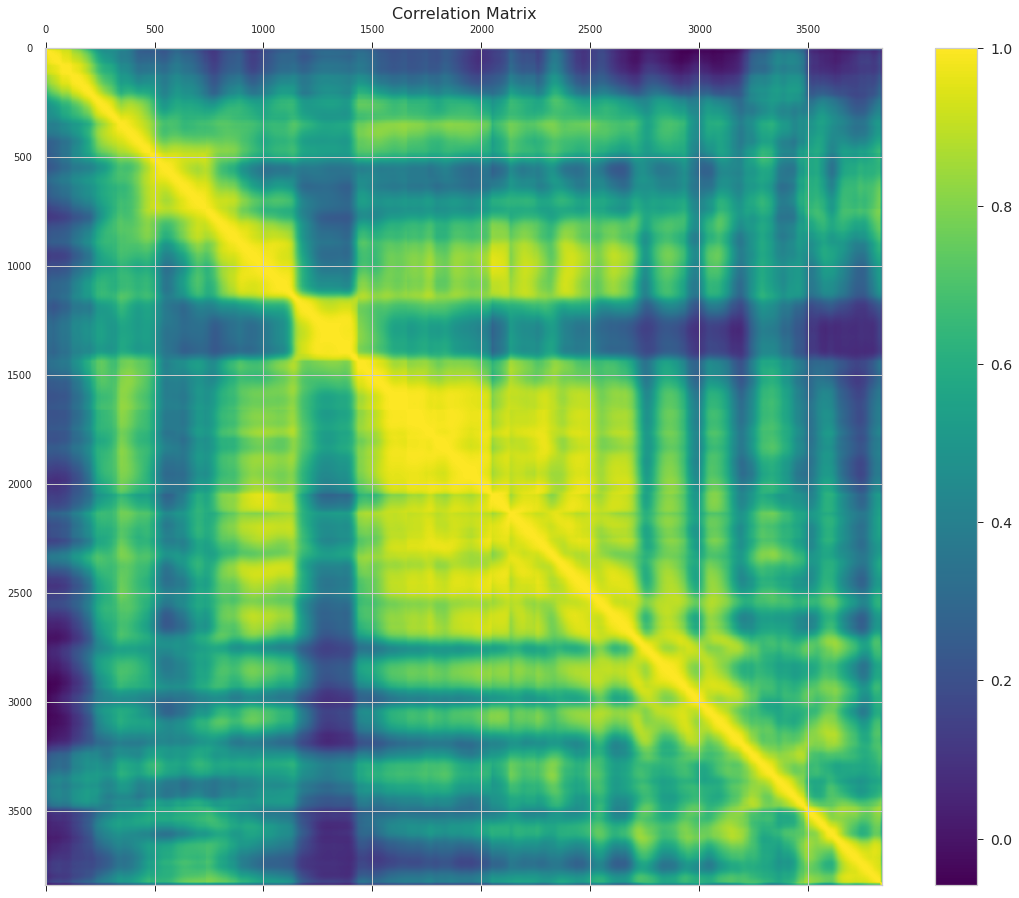

In [14]:
denom = 16
l = len(rd_df.T)
corrMatrix=rd_df.diff().dropna().rolling(round(l/denom), axis=1).std().dropna(axis=1).corr("pearson")
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

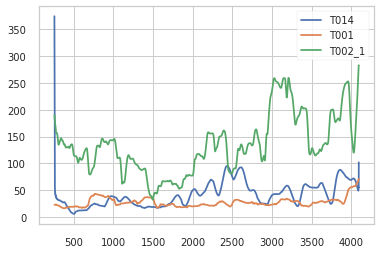

In [15]:
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T014"].plot(legend=True)
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T001"].plot(legend=True)
_=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T002_1"].plot(legend=True)


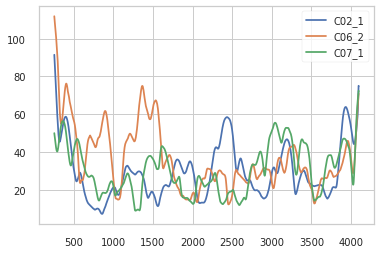

In [16]:
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C02_1"].plot(legend=True)
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C06_2"].plot(legend=True)
_=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C07_1"].plot(legend=True)

There is strong correlation between all the data points

In [17]:
labels = metadf["level"]
labels.values.astype('int8').shape

(53,)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_df
y_train=labels.values

In [19]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [20]:
df_lda=pd.DataFrame(X_train_lda, columns=["LDA1", "LDA2"])
df_lda["labels"]=y_train.T
df_lda.head()

,LDA1,LDA2,labels
0,0.735189,0.115482,0
1,0.353924,-1.509323,0
2,-2.565991,1.836546,0
3,0.738481,0.327096,0
4,-2.337127,0.209630,0


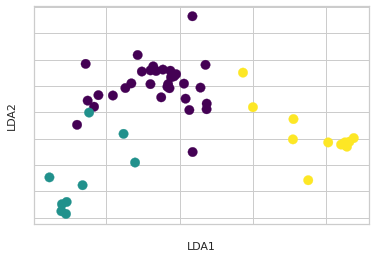

In [21]:
ax=df_lda.plot.scatter(x="LDA1", y="LDA2", c="labels", s=90, cmap="viridis", legend=True, colorbar=False)
ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])

In [22]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [23]:
df_pca=pd.DataFrame(X_train_pca[:,:3], columns=["PCA1", "PCA2", "PCA3"])
df_pca["labels"]=y_train.T
df_pca.head()

,PCA1,PCA2,PCA3,labels
0,-63.925871,-0.006942,0.032608,0
1,-61.465363,0.472232,0.138988,0
2,-57.812550,0.342200,0.118356,0
3,-58.237942,-0.256787,0.782946,0
4,-60.420189,0.082563,0.275475,0


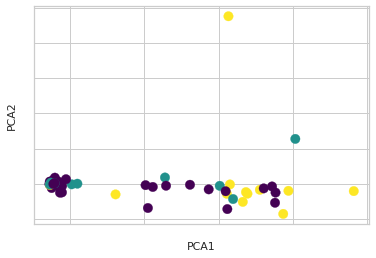

In [24]:
ax=df_pca.plot.scatter(x="PCA1", y="PCA2", c="labels", cmap="viridis", s=90, colorbar=False)
ax.xaxis.set_ticklabels([])
_ = ax.yaxis.set_ticklabels([])

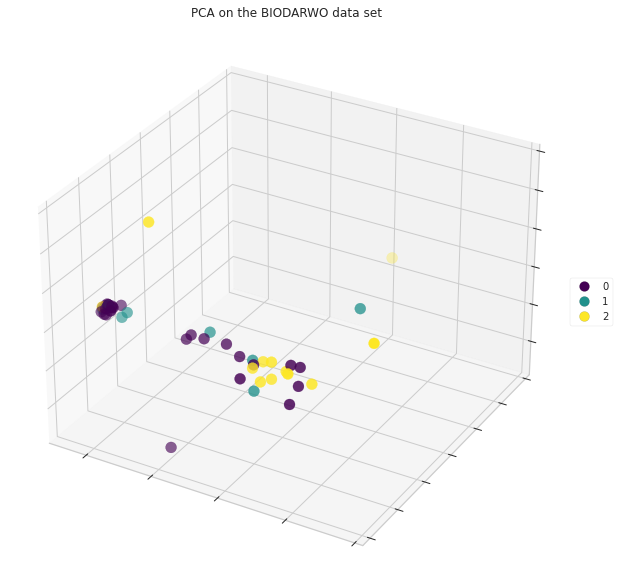

In [25]:
# Plot initialisation
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca['PCA1'], 
           df_pca['PCA2'], 
           df_pca['PCA3'], c=df_pca.labels, cmap="viridis", s=120)
    
# label the axes
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")

ax.set_xticklabels("")
ax.set_yticklabels("")
ax.set_zticklabels("")

colors = [sc.cmap(sc.norm(i)) for i in [0.0, 1.0, 2.0]]

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]

ax.legend(custom_lines, ['0','1', '2'], loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_title("PCA on the BIODARWO data set")
plt.show()

In [26]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

score='accuracy'
X = X_train_lda
y = y_train

loo = LeaveOneOut()

In [27]:
# svm model
clf = SVC(kernel='rbf', gamma=1e-1, C=10**1)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm: {}".format(cv['train_score'].mean()))
print("test score svm: {}".format(cv['test_score'].mean()))

train score svm: 0.980769230769231
test score svm: 0.9433962264150944


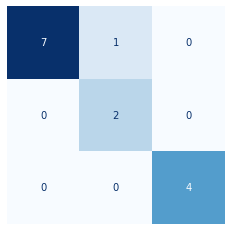

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
_=plt.axis('off')

In [29]:
# RandomForest
clf = RandomForestClassifier(n_estimators=30, random_state=38)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score RandomForest: {}".format(cv['train_score'].mean()))
print("test score RandomForest: {}".format(cv['test_score'].mean()))

train score RandomForest: 1.0
test score RandomForest: 0.9245283018867925


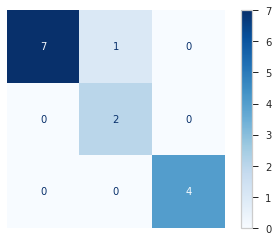

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [31]:
# Knn
clf = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score Knn: {}".format(cv['train_score'].mean()))
print("test score Knn: {}".format(cv['test_score'].mean()))

train score Knn: 0.9426705370101598
test score Knn: 0.9056603773584906


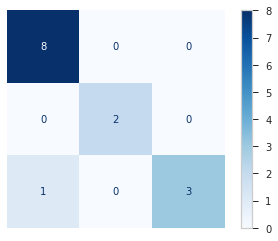

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [33]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=5, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9291251384274639
test score svm
0.9236363636363636


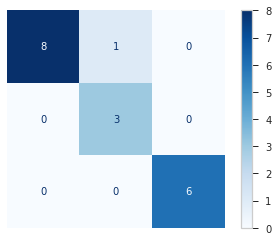

In [34]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, test_size=0.33)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')